In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [45]:
import csv
import os

In [2]:
%matplotlib inline

In [32]:
log_dicts = sorted(glob.glob('logs_*/'), key= lambda x:int(x.split('_')[1].split('/')[0]))

In [62]:
def read_to_dict(file_name):
    res_dict = {}
    keym = {}
    with open(file_name, newline='') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',')
        for i, row in enumerate(csv_reader):
            if i == 0:
                for j, rr in enumerate(row):
                    res_dict[rr] = []
                    keym[j] = rr
            else:
                for j, rr in enumerate(row):
                    res_dict[keym[j]].append(float(rr))
    return res_dict

In [64]:
train_res_dict = {}
val_res_dict = {}
test_res_dict = {}
in_test_res_dict = {}

for logd in log_dicts:
    keym = {}
    train_res_dict[logd] = read_to_dict('{}train_algo.csv'.format(logd))
    val_res_dict[logd] = read_to_dict('{}val_eval.csv'.format(logd))
    test_res_dict[logd] = read_to_dict('{}test_eval.csv'.format(logd))
    if os.path.isfile('{}id_val_eval.csv'.format(logd)):
        in_test_res_dict[logd] = read_to_dict('{}id_val_eval.csv'.format(logd))

In [65]:
ERM_train_res_dict = read_to_dict('/export/work/osener/wilds/ERM_LOGS/iwild/train_algo.csv')
ERM_val_res_dict = read_to_dict('/export/work/osener/wilds/ERM_LOGS/iwild/val_eval.csv')
ERM_test_res_dict = read_to_dict('/export/work/osener/wilds/ERM_LOGS/iwild/test_eval.csv')
ERM_in_test_res_dict = read_to_dict('/export/work/osener/wilds/ERM_LOGS/iwild/id_val_eval.csv')

In [70]:
ERM_train_res_dict['global_batch'] = np.max(ERM_train_res_dict['batch'])*np.array(ERM_train_res_dict['epoch']) + np.array(ERM_train_res_dict['batch'])

In [73]:
for logd in train_res_dict:
    train_res_dict[logd]['global_batch'] = np.max(train_res_dict[logd]['batch'])*np.array(train_res_dict[logd]['epoch']) + np.array(train_res_dict[logd]['batch'])

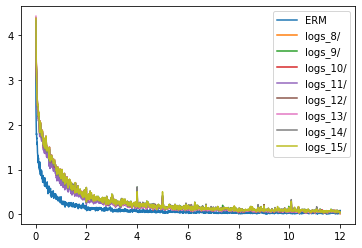

In [80]:
plt.plot(np.array(ERM_train_res_dict['global_batch'])/np.max(ERM_train_res_dict['batch']), ERM_train_res_dict['objective'], label='ERM')
for logi in range(8,16):
    logd = 'logs_{}/'.format(logi)
    plt.plot(np.array(train_res_dict[logd]['global_batch'])/np.max(train_res_dict[logd]['batch']), train_res_dict[logd]['objective'], label=logd)
plt.legend()

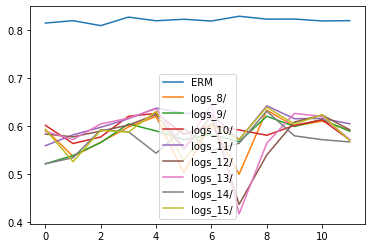

In [83]:
plt.plot(ERM_in_test_res_dict['epoch'], ERM_in_test_res_dict['acc_avg'], label='ERM')
for logi in range(8,16):
    logd = 'logs_{}/'.format(logi)
    plt.plot(in_test_res_dict[logd]['epoch'], in_test_res_dict[logd]['acc_avg'], label=logd)
plt.legend()

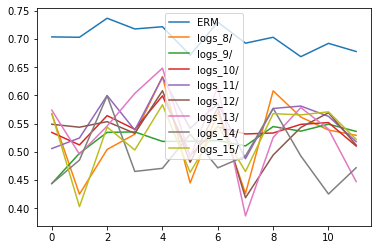

In [84]:
plt.plot(ERM_test_res_dict['epoch'], ERM_test_res_dict['acc_avg'], label='ERM')
for logi in range(8,16):
    logd = 'logs_{}/'.format(logi)
    plt.plot(test_res_dict[logd]['epoch'], test_res_dict[logd]['acc_avg'], label=logd)
plt.legend()

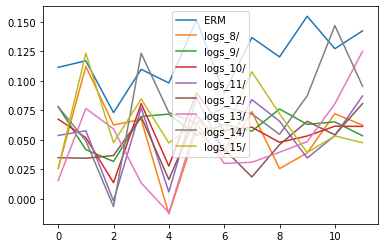

In [89]:
plt.plot( ERM_test_res_dict['epoch'], np.array(ERM_in_test_res_dict['acc_avg']) - np.array(ERM_test_res_dict['acc_avg']), label='ERM')
for logi in range(8,16):
    logd = 'logs_{}/'.format(logi)
    plt.plot(test_res_dict[logd]['epoch'], np.array(in_test_res_dict[logd]['acc_avg']) - np.array(test_res_dict[logd]['acc_avg']), label=logd)
plt.legend()